**Objective:**

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

You are the best data scientist in Greenland and they've hired you to solve this problem.Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).



**Dataset & Data Description:**

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment

Data Description:

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [1]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

# Let's have a look at what our data is like


In [3]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [4]:
pharma_data.shape

(23097, 18)

In [5]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [6]:
pharma_data.tail()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
23096,3947,21,6266,DX6,50,18.391156,YES,RURAL,Stable,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0


In [7]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [8]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

# Checking if there is any missing data 

In [9]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

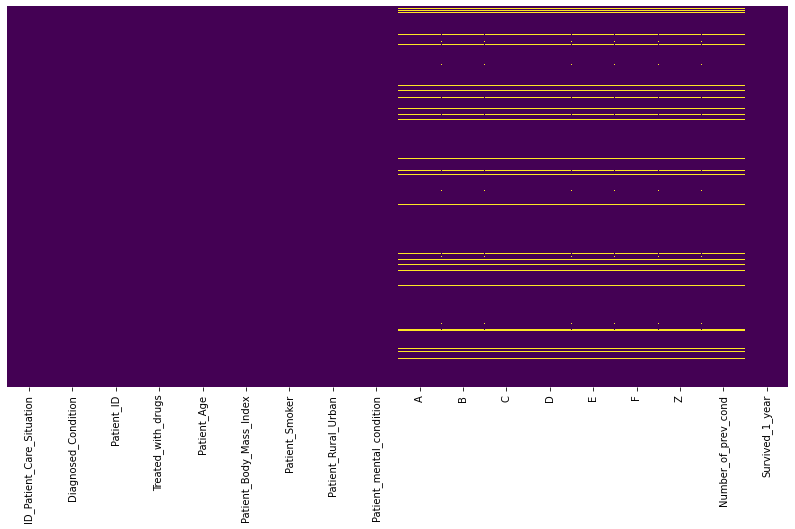

In [10]:
plt.figure(figsize=(14, 7))
sns.heatmap(pharma_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# To get percentage of missing data in each column
pharma_data.isnull().sum() / len(pharma_data) * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

# Let's Take a Look at the Caregorical features

In [12]:
pharma_data['Treated_with_drugs'].nunique()

32

In [13]:
pharma_data['Treated_with_drugs'].unique()

array(['DX6', 'DX2 ', 'DX1 ', nan, 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [14]:
pharma_data['Treated_with_drugs'].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [15]:
pharma_data['Patient_Smoker'].nunique()

3

In [16]:
pharma_data['Patient_Smoker'].unique()

array(['YES', 'NO', 'Cannot say'], dtype=object)

In [17]:
pharma_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [18]:
pharma_data['Patient_Rural_Urban'].nunique()

2

In [19]:
pharma_data['Patient_Rural_Urban'].unique()

array(['URBAN', 'RURAL'], dtype=object)

In [20]:
pharma_data['Patient_Rural_Urban'].value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [21]:
pharma_data['Patient_mental_condition'].nunique()

1

In [22]:
pharma_data['Patient_mental_condition'].unique()

array(['Stable'], dtype=object)

In [23]:
pharma_data['Patient_mental_condition'].value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

# Target Variable check

In [24]:
pharma_data['Survived_1_year'].nunique()

2

In [25]:
pharma_data['Survived_1_year'].unique()

array([0, 1])

In [26]:
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

# Treating the Missing data

###### Treated_with_drugs

In [27]:
pharma_data['Treated_with_drugs'].isnull().sum()

13

In [28]:
pharma_data.loc[pd.isna(pharma_data['Treated_with_drugs']), :].index

Int64Index([4, 218, 2540, 2711, 4308, 4887, 6308, 10388, 10663, 12782, 18630,
            19123, 21705],
           dtype='int64')

In [29]:
pharma_data['Treated_with_drugs'].mode()

0    DX6
dtype: object

In [30]:
pharma_data['Treated_with_drugs'].mode()[0]

'DX6'

In [31]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0])

In [32]:
pharma_data['Treated_with_drugs'].isnull().sum()

0

###### Previous_Condition and Number_of_prev_cond

In [33]:
pharma_data[['A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']] = pharma_data[['A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond']].fillna(0)

In [34]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


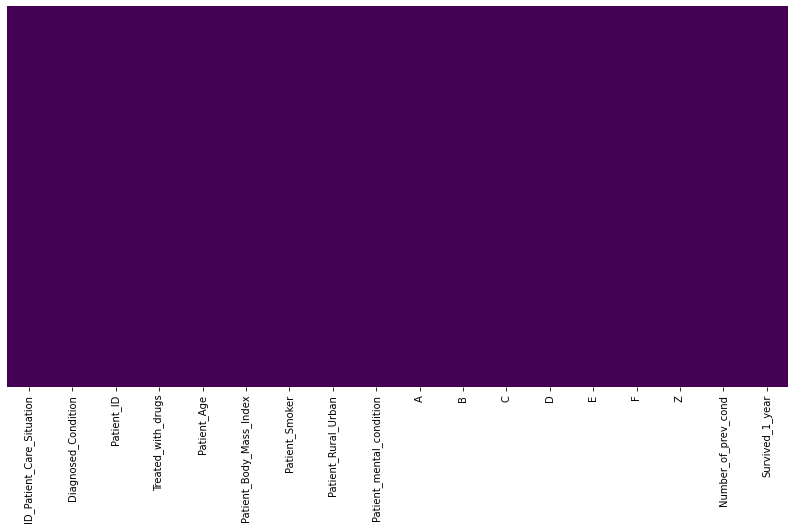

In [35]:
plt.figure(figsize=(14, 7))
sns.heatmap(pharma_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

# Exploratory Data Analysis

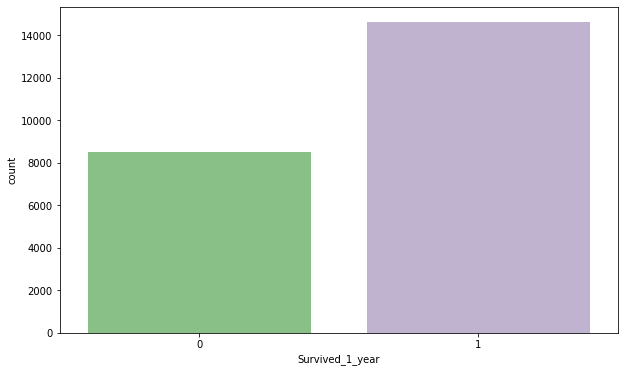

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',data= pharma_data,palette='Accent')

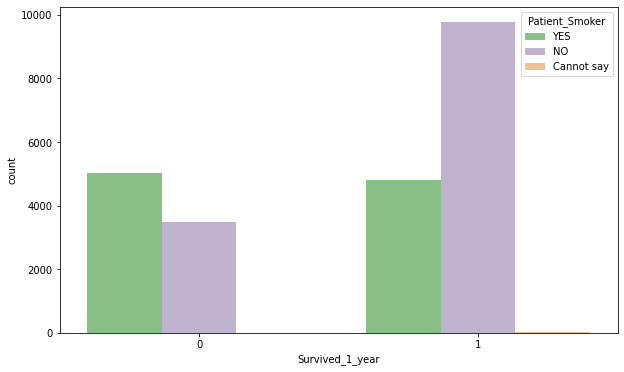

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Smoker',data= pharma_data,palette='Accent')

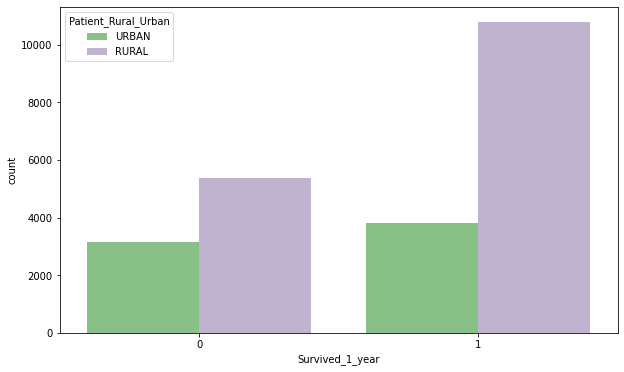

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Patient_Rural_Urban',data= pharma_data,palette='Accent')

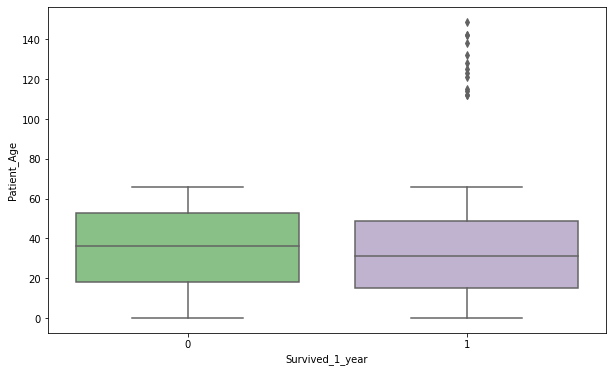

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Age',data=pharma_data,palette='Accent')

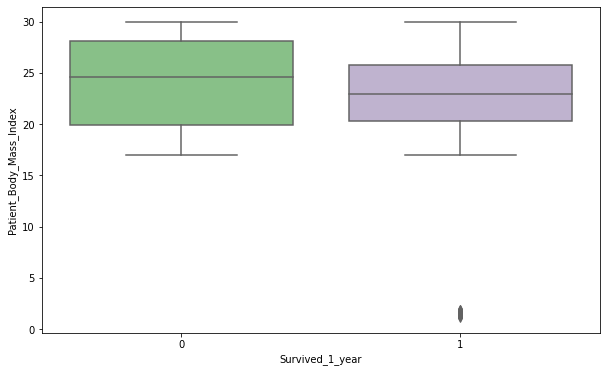

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived_1_year',y='Patient_Body_Mass_Index',data=pharma_data,palette='Accent')

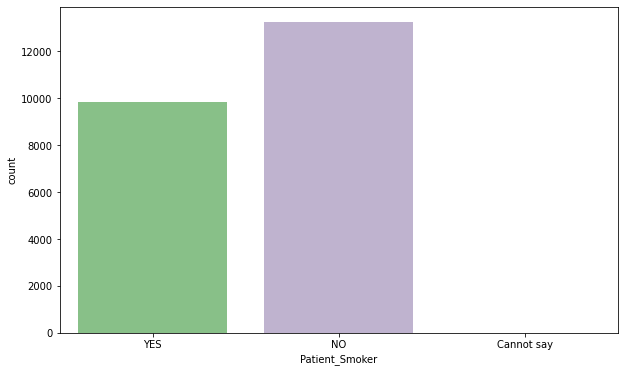

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Patient_Smoker',data=pharma_data,palette='Accent')

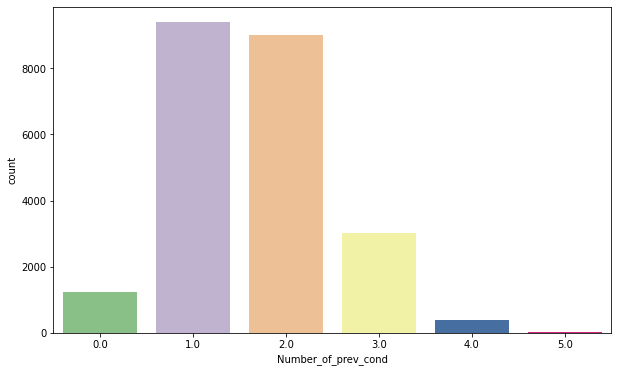

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_prev_cond',data=pharma_data,palette='Accent')

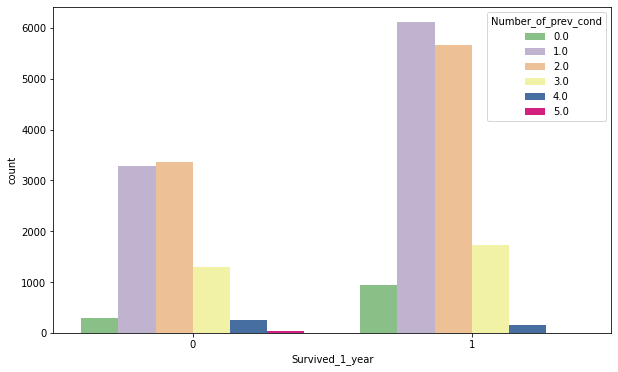

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Survived_1_year',hue='Number_of_prev_cond',data= pharma_data,palette='Accent')

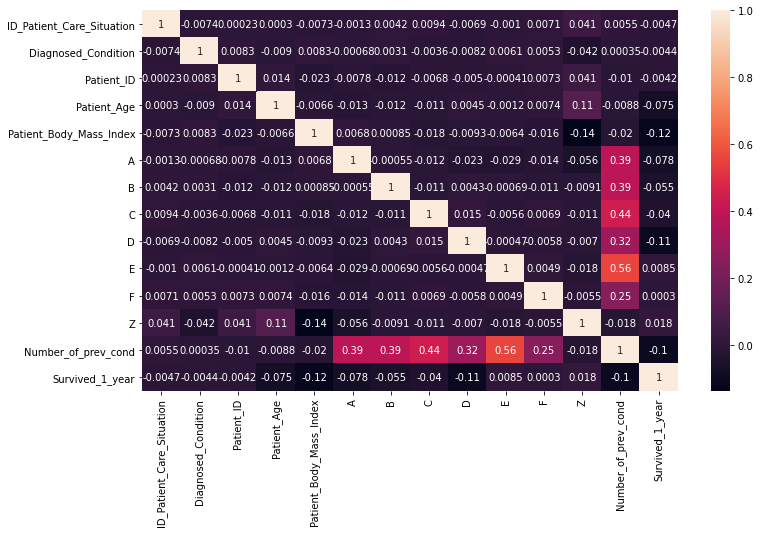

In [45]:
plt.figure(figsize=(12, 7))
sns.heatmap(pharma_data.corr(), annot = True)

# Converting Categorical Features


In [46]:
data = pharma_data

In [47]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [48]:
smoker = pd.get_dummies(data['Patient_Smoker'],drop_first=True)

In [49]:
data.drop(['Patient_Smoker'],axis=1,inplace=True)

In [50]:
data = pd.concat([data,smoker],axis=1)

In [51]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES
0,22374,8,3333,DX6,56,18.479385,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1
1,18164,5,5740,DX2,36,22.945566,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
2,6283,23,10446,DX6,48,27.510027,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
3,5339,51,12011,DX1,5,19.130976,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
4,33012,0,12513,DX6,128,1.348400,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0


In [52]:
urban_rural = pd.get_dummies(data['Patient_Rural_Urban'])

In [53]:
data.drop(['Patient_Rural_Urban'],axis=1,inplace=True)

In [54]:
data = pd.concat([data,urban_rural],axis=1)

In [55]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN
0,22374,8,3333,DX6,56,18.479385,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1
1,18164,5,5740,DX2,36,22.945566,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0
2,6283,23,10446,DX6,48,27.510027,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0
3,5339,51,12011,DX1,5,19.130976,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1
4,33012,0,12513,DX6,128,1.348400,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0


In [56]:
mental_cond = pd.get_dummies(data['Patient_mental_condition'])

In [57]:
data.drop(['Patient_mental_condition'],axis=1,inplace=True)

In [58]:
data = pd.concat([data,mental_cond],axis=1)

In [59]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN,Stable
0,22374,8,3333,DX6,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1
1,18164,5,5740,DX2,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1
2,6283,23,10446,DX6,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1
3,5339,51,12011,DX1,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1
4,33012,0,12513,DX6,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1


**BMI	Weight Status**

Below 18.5	Underweight

18.5 – 24.9	Normal or Healthy Weight

25.0 – 29.9	Overweight

30.0 and Above	Obese

In [60]:
def BMI_func(bmi):
  if bmi < 18.5:
    return 'Underweight'
  
  elif bmi > 18.5 and bmi < 24.9:
    return 'Healthy Weight'

  elif bmi >25.0 and bmi < 29.9:
    return 'Overweight'

  else :
    return 'Obese'

In [61]:
data['Patient_Body_Mass_Index'] = data['Patient_Body_Mass_Index'].apply(BMI_func)

In [62]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN,Stable
0,22374,8,3333,DX6,56,Underweight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1
1,18164,5,5740,DX2,36,Healthy Weight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1
2,6283,23,10446,DX6,48,Overweight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1
3,5339,51,12011,DX1,5,Healthy Weight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1
4,33012,0,12513,DX6,128,Underweight,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1


In [63]:
bmi = pd.get_dummies(data['Patient_Body_Mass_Index'])

In [64]:
data.drop(['Patient_Body_Mass_Index'],axis=1,inplace=True)

In [65]:
data = pd.concat([data,bmi],axis=1)

In [66]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight
0,22374,8,3333,DX6,56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1,0,0,0,1
1,18164,5,5740,DX2,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,0,0
2,6283,23,10446,DX6,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,0,0,1,0
3,5339,51,12011,DX1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1,1,0,0,0
4,33012,0,12513,DX6,128,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,1,0,1,0,0,0,1


In [67]:
data['Treated_with_drugs'].unique()

array(['DX6', 'DX2 ', 'DX1 ', 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [68]:
drugs_df = pd.DataFrame(data.Treated_with_drugs.str.split(' ').tolist(), index=data.ID_Patient_Care_Situation).stack()

In [69]:
drugs_df = drugs_df.reset_index([0, 'ID_Patient_Care_Situation']).set_index('ID_Patient_Care_Situation')

In [70]:
drugs_df

,0
ID_Patient_Care_Situation,
22374,DX6
18164,DX2
18164,
6283,DX6
5339,DX1
...,...
15503,DX6
2167,DX6
31646,DX3


In [71]:
drugs_df = pd.get_dummies(drugs_df[0]).reset_index().drop([''], axis=1)

In [72]:
drugs_df

,ID_Patient_Care_Situation,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,0,0,0,0,0,1
1,18164,0,1,0,0,0,0
2,18164,0,0,0,0,0,0
3,6283,0,0,0,0,0,1
4,5339,1,0,0,0,0,0
...,...,...,...,...,...,...,...
43917,15503,0,0,0,0,0,1
43918,2167,0,0,0,0,0,1
43919,31646,0,0,1,0,0,0
43920,31646,0,0,0,0,0,0


In [73]:
data = pd.merge(data, drugs_df, on = "ID_Patient_Care_Situation")

In [74]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,DX6,56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1
1,18164,5,5740,DX2,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0
2,18164,5,5740,DX2,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
3,6283,23,10446,DX6,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1
4,5339,51,12011,DX1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0


In [75]:
data_fin = data.drop('Treated_with_drugs', axis=1)

In [76]:
data_fin.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1
1,18164,5,5740,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0
2,18164,5,5740,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
3,6283,23,10446,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1
4,5339,51,12011,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0


# Train - Test Split

In [77]:
X = data_fin.drop(['Survived_1_year'],axis=1)

In [78]:
X.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1
1,18164,5,5740,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0
2,18164,5,5740,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
3,6283,23,10446,48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1
4,5339,51,12011,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0


In [79]:
y = data_fin[['Survived_1_year']]

In [80]:
y.head()

,Survived_1_year
0,0
1,1
2,1
3,0
4,1


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Creating and Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

# Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49      2747
           1       0.77      0.89      0.82      6038

    accuracy                           0.74      8785
   macro avg       0.70      0.65      0.66      8785
weighted avg       0.72      0.74      0.72      8785



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1103 1644]
 [ 654 5384]]


In [ ]:
accuracy_score(y_test,predictions)

0.7384177575412635

In [ ]:
f1_score(y_test,predictions)

0.8241236797795806

# Testing Data

In [112]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [113]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [115]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [116]:
test_new['Patient_Smoker'].unique()

array(['NO', 'YES'], dtype=object)

In [117]:
smoker_test = pd.get_dummies(test_new['Patient_Smoker'])

In [118]:
test_new.drop(['Patient_Smoker'],axis=1,inplace=True)

In [119]:
test_new = pd.concat([test_new,smoker_test],axis=1)

In [120]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES
0,19150,40,3709,DX3,16,29.443894,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0
1,23216,52,986,DX6,24,26.836321,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0
2,11890,50,11821,DX4 DX5,63,25.523280,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0
3,7149,32,3292,DX6,42,27.171155,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0
4,22845,20,9959,DX3,50,25.556192,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0


In [121]:
urban_rural_test = pd.get_dummies(test_new['Patient_Rural_Urban'])

In [122]:
test_new.drop(['Patient_Rural_Urban'],axis=1,inplace=True)

In [123]:
test_new = pd.concat([test_new,urban_rural_test],axis=1)

In [124]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN
0,19150,40,3709,DX3,16,29.443894,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0
1,23216,52,986,DX6,24,26.836321,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1
2,11890,50,11821,DX4 DX5,63,25.523280,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0
3,7149,32,3292,DX6,42,27.171155,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1
4,22845,20,9959,DX3,50,25.556192,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0


In [125]:
mental_cond_test = pd.get_dummies(test_new['Patient_mental_condition'])

In [126]:
test_new.drop(['Patient_mental_condition'],axis=1,inplace=True)

In [127]:
test_new = pd.concat([test_new,mental_cond_test],axis=1)

In [128]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable
0,19150,40,3709,DX3,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1
1,23216,52,986,DX6,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1
2,11890,50,11821,DX4 DX5,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1
3,7149,32,3292,DX6,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1
4,22845,20,9959,DX3,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1


In [129]:
test_new['Patient_Body_Mass_Index'] = test_new['Patient_Body_Mass_Index'].apply(BMI_func)

In [130]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable
0,19150,40,3709,DX3,16,Overweight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1
1,23216,52,986,DX6,24,Overweight,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1
2,11890,50,11821,DX4 DX5,63,Overweight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1
3,7149,32,3292,DX6,42,Overweight,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1
4,22845,20,9959,DX3,50,Overweight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1


In [131]:
bmi_test = pd.get_dummies(test_new['Patient_Body_Mass_Index'])

In [132]:
test_new.drop(['Patient_Body_Mass_Index'],axis=1,inplace=True)

In [133]:
test_new = pd.concat([test_new,bmi_test],axis=1)

In [134]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight
0,19150,40,3709,DX3,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0
1,23216,52,986,DX6,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,0,0,1,0
2,11890,50,11821,DX4 DX5,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0
3,7149,32,3292,DX6,42,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1,0,0,1,0
4,22845,20,9959,DX3,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,1,0


In [135]:
test_new['Treated_with_drugs'].unique()

array(['DX3 ', 'DX6', 'DX4 DX5 ', 'DX1 DX2 ', 'DX1 DX2 DX4 ', 'DX2 ',
       'DX5 ', 'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX1 ', 'DX2 DX5 ', 'DX1 DX4 ',
       'DX2 DX3 ', 'DX4 ', 'DX1 DX4 DX5 ', 'DX3 DX4 ', 'DX3 DX5 ',
       'DX2 DX4 ', 'DX1 DX5 ', 'DX1 DX3 DX4 ', 'DX2 DX3 DX4 ',
       'DX1 DX2 DX3 ', 'DX1 DX3 DX4 DX5 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX3 DX5 ', 'DX2 DX3 DX5 ', 'DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX2 DX4 DX5 ', 'DX2 DX4 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX4 '], dtype=object)

In [136]:
test_new['Treated_with_drugs'].nunique()

32

In [137]:
drugs_df_test = pd.DataFrame(test_new.Treated_with_drugs.str.split(' ').tolist(), index=test_new.ID_Patient_Care_Situation).stack()

In [138]:
drugs_df_test = drugs_df_test.reset_index([0, 'ID_Patient_Care_Situation']).set_index('ID_Patient_Care_Situation')

In [139]:
drugs_df_test

,0
ID_Patient_Care_Situation,
19150,DX3
19150,
23216,DX6
11890,DX4
11890,DX5
...,...
11885,DX5
11885,
25101,DX4


In [140]:
drugs_df_test = pd.get_dummies(drugs_df_test[0]).reset_index().drop([''], axis=1)

In [141]:
drugs_df_test.head()

,ID_Patient_Care_Situation,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,0,0,1,0,0,0
1,19150,0,0,0,0,0,0
2,23216,0,0,0,0,0,1
3,11890,0,0,0,1,0,0
4,11890,0,0,0,0,1,0


In [142]:
test_new = pd.merge(test_new, drugs_df_test, on = "ID_Patient_Care_Situation")

In [143]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,DX3,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,19150,40,3709,DX3,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,23216,52,986,DX6,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,11890,50,11821,DX4 DX5,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,11890,50,11821,DX4 DX5,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [144]:
test_new_fin = test_new.drop('Treated_with_drugs', axis=1)

In [145]:
test_new_fin.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,19150,40,3709,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,23216,52,986,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,11890,50,11821,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,11890,50,11821,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [146]:
test_new_fin = test_new_fin

In [147]:
test_new_fin.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,A,B,C,D,E,F,Z,Number_of_prev_cond,NO,YES,RURAL,URBAN,Stable,Healthy Weight,Obese,Overweight,Underweight,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,19150,40,3709,16,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0
2,23216,52,986,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,11890,50,11821,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,11890,50,11821,63,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [148]:
X.shape

(43922, 27)

In [149]:
test_new_fin.shape

(17622, 27)

# Predicting on New Test Data

In [ ]:
new_predictions = logmodel.predict(test_new_fin)

In [ ]:
new_predictions

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(new_predictions)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Patient_Survival0_1.csv')         
files.download('Patient_Survival0_1.csv')'''

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(new_predictions)\nres.index = test_new.index # its important for comparison\nres.columns = ["prediction"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'Patient_Survival0_1.csv\')         \nfiles.download(\'Patient_Survival0_1.csv\')'

# Random Forest Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predrfc = rfc.predict(X_test) 

In [ ]:
predrfc

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2747
           1       0.91      0.93      0.92      6038

    accuracy                           0.89      8785
   macro avg       0.87      0.86      0.86      8785
weighted avg       0.88      0.89      0.88      8785



In [ ]:
print(confusion_matrix(y_test,predrfc))

[[2177  570]
 [ 436 5602]]


In [ ]:
accuracy_score(y_test,predrfc)

0.885486624928856

In [ ]:
f1_score(y_test,predrfc)

0.9176085176085176

# Predcitions on New Test Data

In [ ]:
new_predrfc = rfc.predict(test_new_fin)

In [ ]:
new_predrfc

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(new_predrfc)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Patient_Survival1_1.csv')         
files.download('Patient_Survival1_1.csv')'''


# Drop from 70 to 65

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(new_predrfc)\nres.index = test_new.index # its important for comparison\nres.columns = ["prediction"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'Patient_Survival1_1.csv\')         \nfiles.download(\'Patient_Survival1_1.csv\')'

# RFE


In [ ]:
X = data_fin.drop(['Survived_1_year'],axis=1)

y = data_fin['Survived_1_year']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= rfc , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 13
Selected Features: [ True  True  True  True  True False False  True False False False  True
  True  True  True False False  True False  True False False False False
 False False  True]
Feature Ranking: [ 1  1  1  1  1  4  3  1  2 10 14  1  1  1  1  5 15  1 13  1  6  9 12 11
  7  8  1]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,ID_Patient_Care_Situation,1
19,Overweight,1
17,Healthy Weight,1
14,RURAL,1
12,NO,1
11,Number_of_prev_cond,1
7,D,1
13,YES,1
2,Patient_ID,1
1,Diagnosed_Condition,1


In [ ]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = rfc.fit(X_train_rfe, y_train)

In [ ]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.9256687535571998
RFE Model F1 Score: 0.9457415870378064


In [ ]:
og_test_rfe = rfe.transform(test_new_fin)

In [ ]:
og_pred_rfe = lr_rfe_model.predict(og_test_rfe)

In [ ]:
og_pred_rfe

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(og_pred_rfe)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Patient_Survivalrfe.csv')         
files.download('Patient_Survivalrfe.csv')'''

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(og_pred_rfe)\nres.index = test_new.index # its important for comparison\nres.columns = ["prediction"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'Patient_Survivalrfe.csv\')         \nfiles.download(\'Patient_Survivalrfe.csv\')'

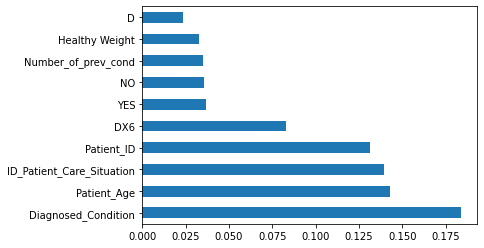

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.13 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.13)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [ ]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model Accuracy:", rf_imp_ac)
print("Limited Features Model F1 Score:", rf_imp_fscore)

Limited Features Model Accuracy: 0.8963005122367672
Limited Features Model F1 Score: 0.9245298649656201


In [ ]:
og_imp_test = rf_sfm.transform(test_new_fin)

In [ ]:
og_important_pred = clf_important.predict(og_imp_test)

In [ ]:
og_important_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(og_important_pred)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Patient_Survivalimp.csv')         
files.download('Patient_Survivalimp.csv')'''

'# To create Dataframe of predicted value with particular respective index\nres = pd.DataFrame(og_important_pred)\nres.index = test_new.index # its important for comparison\nres.columns = ["prediction"]\n\n# To download the csv file locally\nfrom google.colab import files\nres.to_csv(\'Patient_Survivalimp.csv\')         \nfiles.download(\'Patient_Survivalimp.csv\')'

Feature Importances :  [0.00473554 0.07399724 0.00489487 0.04885964 0.04397991 0.02466855
 0.09095129 0.0570859  0.         0.         0.         0.01883391
 0.14550088 0.0784715  0.0564768  0.         0.         0.09502269
 0.         0.02604955 0.01738397 0.01553835 0.         0.02102188
 0.02102214 0.02903102 0.12647438]


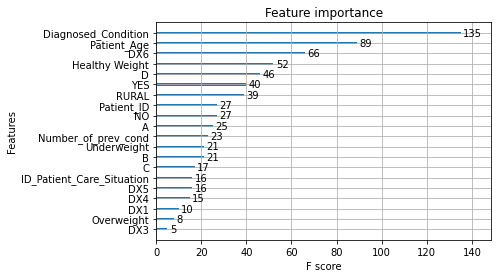

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model1 = XGBClassifier(random_state = 0 )

xgb_model1.fit(X_train, y_train)

print("Feature Importances : ", xgb_model1.feature_importances_)

# plot feature importance
import matplotlib.pyplot as plt # for visualisation
plot_importance(xgb_model1)
plt.show()

In [ ]:
selection1 = SelectFromModel(xgb_model1)
selection1.fit(X_train, y_train)

# Transform the train and test features
select_x_train1 = selection1.transform(X_train)
select_x_test1 = selection1.transform(X_test) 

# train model
selection_model1 = XGBClassifier()
selection_model1.fit(select_x_train1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_xgb = selection_model1.predict(select_x_test1)

In [ ]:
pred_xgb

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(confusion_matrix(y_test,pred_xgb))

[[1580 1167]
 [ 529 5509]]


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65      2747
           1       0.83      0.91      0.87      6038

    accuracy                           0.81      8785
   macro avg       0.79      0.74      0.76      8785
weighted avg       0.80      0.81      0.80      8785



In [ ]:
print(accuracy_score(y_test,pred_xgb))

0.8069436539556062


In [ ]:
print(f1_score(y_test,pred_xgb))

0.8666037439043575


In [ ]:
og_test_xgb = selection1.transform(test_new_fin) 

In [ ]:
og_pred_xgb = selection_model1.predict(og_test_xgb)

In [ ]:
og_pred_xgb

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(og_pred_xgb)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Patient_SurvivalXGB.csv')         
files.download('Patient_SurvivalXGB.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [93]:
## Hyper Parameter Optimization

params1 ={
 "n_estimators": [300,600,800,1000],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [94]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [95]:
Xgb_classifier1 = XGBClassifier(random_state= 0)

In [96]:
random_search1 = RandomizedSearchCV(Xgb_classifier1,param_distributions=params1,
                                   n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [97]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search1.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Time taken: 0 hours 9 minutes and 39.02 seconds.


In [98]:
random_search1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
random_search1.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 15,
 'min_child_weight': 5,
 'n_estimators': 800}

In [100]:
random_search1.best_score_

0.9320005367098043

In [105]:
ss= random_search1.best_estimator_.predict(X_test)

In [106]:
ss

array([0, 1, 1, ..., 1, 1, 1])

In [107]:
print(classification_report(y_test,ss))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2747
           1       0.94      0.94      0.94      6038

    accuracy                           0.92      8785
   macro avg       0.91      0.91      0.91      8785
weighted avg       0.92      0.92      0.92      8785



In [108]:
print(confusion_matrix(y_test,ss))

[[2408  339]
 [ 341 5697]]


In [109]:
print(accuracy_score(y_test,ss))

0.9225953329538987


In [110]:
print(f1_score(y_test,ss))

0.9436806360775218


In [150]:
pred_new_ss = random_search1.best_estimator_.predict(test_new_fin)

In [151]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(pred_new_ss)
res.index = test_new.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Predictions_hel.csv')         
files.download('Predictions_hel.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>